# [DataVis] - ECVD2

Esse notebook tem como objetivo a análise exploratória de dados referentes a presença de HIV/AIDS no estado da Paraíba de 2019 à 2024.

Todos os dados são provenientes do sistema [DataSus](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/nrpb.def), fornecidos pelo próprio governo federal.

## Imports

In [77]:
# Tratamento de strings
import unicodedata

# Análise
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

## Configs

In [2]:
# Exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formatação
pd.set_option('display.float_format', '{:.2f}'.format)

## Dados

In [3]:
df_mun = pd.read_csv('data/datasus_hiv_mun_2019-2024.csv', sep=';', skiprows=4, encoding='latin-1').sort_values(by='Total', ascending=False)
df_mun = df_mun.iloc[:-4]
df_mun['Município'] = df_mun['Município'].str.replace(r'^\d+\s+', '', regex=True)
df_mun.head(10)

,Município,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,2022/Mai,2022/Jun,2022/Jul,2022/Ago,2022/Set,2022/Out,2022/Nov,2022/Dez,2023/Jan,2023/Fev,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,Total
165,Total,53,84,80,103,103,109,102,136,141,83,92,89,94,89,68,39,67,53,37,54,48,40,62,46,43,123,143,150,129,130,158,130,155,128,77,177,148,121,159,166,224,157,187,156,176,130,80,105,181,64,54,169,147,68,80,76,91,83,87,74,78,81,60,88,91,94,59,78,88,128,99,129,7471.00
71,JOAO PESSOA,20,25,25,46,41,48,44,56,63,39,31,35,42,41,27,11,26,16,11,20,19,15,27,21,12,75,75,81,71,63,86,66,86,68,35,99,72,61,100,94,121,77,101,76,94,80,24,54,110,30,26,80,85,40,33,30,47,36,37,28,28,33,24,40,36,53,21,39,47,66,58,64,3611.00
22,BAYEUX,1,11,10,3,8,11,9,13,14,10,10,10,9,7,1,5,6,5,3,-,-,-,4,1,2,8,4,15,11,19,17,15,7,4,6,15,24,9,9,8,11,19,14,12,11,8,11,7,9,5,9,7,10,4,3,3,3,3,4,3,3,4,-,3,8,8,2,2,5,7,6,7,535.00
129,SANTA RITA,2,7,4,7,6,8,5,11,12,7,11,3,2,6,4,1,3,4,2,4,2,-,2,3,1,12,15,8,10,14,8,13,7,6,2,15,6,5,13,12,16,13,15,7,16,10,8,13,12,4,1,11,12,3,3,6,2,2,11,5,2,5,3,3,8,2,5,4,6,6,3,14,494.00
41,CAMPINA GRANDE,3,2,3,6,6,2,4,3,4,4,2,5,3,3,5,3,4,4,3,2,6,2,1,10,6,1,2,2,3,-,4,-,5,6,5,2,7,7,3,4,2,2,4,5,2,8,4,4,2,6,2,3,2,1,1,6,6,5,2,6,5,6,6,8,2,8,6,3,3,7,4,7,285.00
34,CABEDELO,3,3,3,3,2,2,3,4,7,1,1,5,1,-,1,1,3,-,2,1,4,3,2,1,4,4,3,2,3,1,5,1,2,6,5,10,8,9,7,7,21,10,6,9,9,2,-,2,1,-,1,3,3,1,2,7,2,5,1,3,3,2,3,1,5,1,1,3,1,1,3,2,247.00
82,MAMANGUAPE,1,5,2,3,1,3,1,-,3,-,2,3,3,3,4,5,1,5,-,1,-,1,3,-,2,-,5,6,5,4,3,2,9,4,3,2,-,3,1,3,4,2,5,3,5,2,3,6,9,-,-,5,2,1,2,5,2,4,1,2,7,1,4,7,3,2,3,2,1,1,1,3,200.00
60,GUARABIRA,1,4,1,2,3,1,-,3,2,1,2,1,2,3,3,2,2,2,1,2,-,2,1,-,1,3,1,-,-,1,2,5,-,4,2,1,1,1,1,3,-,2,2,3,3,-,-,1,1,1,-,8,1,-,2,-,3,2,2,2,1,-,-,2,-,1,-,1,1,1,2,3,112.00
142,SAPE,1,-,3,5,1,1,2,1,3,2,1,-,2,1,-,-,1,-,-,-,1,-,2,-,1,-,2,3,2,3,2,7,2,3,1,3,1,2,2,2,3,4,4,1,2,-,-,1,-,-,1,1,1,1,1,2,2,1,-,-,1,3,2,-,-,-,1,1,-,3,1,-,100.00
47,CONDE,1,1,1,2,1,1,-,6,1,1,-,-,1,2,1,-,2,1,1,2,1,1,2,-,1,-,3,-,3,1,3,1,4,1,1,1,1,-,1,-,2,4,1,4,-,-,-,-,3,1,3,4,3,2,-,4,1,3,-,-,-,3,1,3,-,3,-,1,1,1,1,1,100.00


In [160]:
df_sex = pd.read_csv('data/datasus_hiv_sex_data_2019-2024.csv', sep=';', skiprows=4, encoding='latin-1').sort_values(by='Total', ascending=False)
df_sex = df_sex.iloc[:-4]
df_sex.head(10)

,Sexo,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,2022/Mai,2022/Jun,2022/Jul,2022/Ago,2022/Set,2022/Out,2022/Nov,2022/Dez,2023/Jan,2023/Fev,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,Total
2,Total,53.00,84.00,80.00,103.00,103.00,109.00,102.00,136.00,141.00,83.00,92.00,89.00,94.00,89.00,68.00,39.00,67.00,53.00,37.00,54.00,48.00,40.00,62.00,46.00,43.00,123.00,143.00,150.00,129.00,130.00,158.00,130.00,155.00,128.00,77.00,177.00,148.00,121.00,159.00,166.00,224.00,157.00,187.00,156.00,176.00,130.00,80.00,105.00,181.00,64.00,54.00,169.00,147.00,68.00,80.00,76.00,91.00,83.00,87.00,74.00,78.00,81.00,60.00,88.00,91.00,94.00,59.00,78.00,88.00,128.00,99.00,129.00,7471.00
0,Masc,31.00,62.00,52.00,67.00,74.00,65.00,65.00,81.00,94.00,49.00,57.00,59.00,56.00,54.00,44.00,29.00,48.00,33.00,27.00,29.00,31.00,21.00,42.00,31.00,25.00,88.00,102.00,109.00,95.00,103.00,124.00,97.00,102.00,85.00,53.00,129.00,115.00,95.00,127.00,126.00,170.00,120.00,144.00,113.00,138.00,103.00,57.00,77.00,146.00,47.00,43.00,130.00,100.00,41.00,52.00,51.00,65.00,67.00,63.00,53.00,49.00,52.00,39.00,64.00,63.00,70.00,34.00,56.00,64.00,95.00,62.00,86.00,5290.00
1,Fem,22.00,22.00,28.00,36.00,29.00,44.00,37.00,55.00,47.00,34.00,35.00,30.00,38.00,35.00,24.00,10.00,19.00,20.00,10.00,25.00,17.00,19.00,20.00,15.00,18.00,35.00,41.00,41.00,34.00,27.00,34.00,33.00,53.00,43.00,24.00,48.00,33.00,26.00,32.00,40.00,54.00,37.00,43.00,43.00,38.00,27.00,23.00,28.00,35.00,17.00,11.00,39.00,47.00,27.00,28.00,25.00,26.00,16.00,24.00,21.00,29.00,29.00,21.00,24.00,28.00,24.00,25.00,22.00,24.00,33.00,37.00,43.00,2181.00


In [5]:
df_sex_age = pd.read_csv('data/datasus_hiv_sex_idade_2019-2024.csv', sep=';', skiprows=4, encoding='latin-1').sort_values(by='Total', ascending=False)
df_sex_age = df_sex_age.iloc[:-4]
df_sex_age.head(10)

,Sexo,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total
2,Total,32.00,12.00,8.00,8.00,89.00,1040.00,2154.00,2119.00,1319.00,512.00,143.00,35.00,7471.00
0,Masc,28.00,8.00,2.00,2.00,27.00,749.00,1624.00,1441.00,903.00,373.00,111.00,22.00,5290.00
1,Fem,4.00,4.00,6.00,6.00,62.00,291.00,530.00,678.00,416.00,139.00,32.00,13.00,2181.00


In [6]:
df_mun_val = pd.read_csv('data/datasus_hiv_mun_valor_2019-2024.csv', sep=';', skiprows=4, encoding='latin-1').sort_values(by='Total', ascending=False)
df_mun_val = df_mun_val.iloc[:-4]
df_mun_val['Município'] = df_mun_val['Município'].str.replace(r'^\d+\s+', '', regex=True)
df_mun_val.head(10)

,Município,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,2022/Mai,2022/Jun,2022/Jul,2022/Ago,2022/Set,2022/Out,2022/Nov,2022/Dez,2023/Jan,2023/Fev,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,Total
35,CACHOEIRA DOS INDIOS,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"520,39",-,"5904,63",-,-,-,-,-,-,-,-,-,-,-,-,"3512,07",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"9937,09"
100,PAULISTA,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"1076,30",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"838,61",-,-,-,"573,25",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"6565,32",-,-,-,-,-,"658,67","9712,15"
102,PEDRA LAVRADA,-,-,-,-,-,-,-,-,"1601,32",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"2106,19","293,59",-,-,"904,79",-,-,-,"1132,20",-,"1139,98",-,-,-,"1528,12",-,-,-,-,-,-,-,-,-,-,"508,07",-,"450,30",-,-,-,-,-,-,-,-,-,-,-,-,"9664,56"
165,Total,"53907,12","81066,67","75373,76","108480,50","123055,76","126373,92","90696,27","142490,61","147718,99","87752,11","85173,71","78621,81","98241,92","89156,65","89167,57","35719,78","91349,69","89029,13","47624,32","99226,84","59698,43","72586,18","84818,05","54139,28","53432,03","56903,64","151775,91","163742,29","175465,18","159387,78","134813,06","176713,69","125100,45","159039,61","93329,40","107461,18","106657,40","58347,17","73344,50","232118,67","185417,67","226833,57","238150,87","184760,30","216222,55","123605,57","153456,32","139391,57","149552,55","122920,53","88999,68","180055,99","240181,54","150614,59","251910,81","143705,44","176146,91","229178,68","171868,47","167125,87","161474,68","172676,43","95587,36","135108,59","167098,59","187698,49","107576,78","146101,33","236235,48","207162,67","163189,97","204451,93","9663562,81"
4,ALAGOINHA,-,"573,25",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"1033,78",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"23,45",-,-,-,-,"1604,51",-,-,-,-,-,-,-,-,"1537,63","800,66",-,-,-,"1080,32",-,-,"995,06",-,-,-,-,-,-,-,"293,59",-,-,"1702,58","9644,83"
134,SAO FRANCISCO,-,-,-,-,-,-,-,-,-,"800,66",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"23,45","46,90",-,-,-,-,"23,45",-,-,"23,45",-,-,-,-,"23,45",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"941,36"
160,UIRAUNA,"353,77",-,-,"694,79","1289,28",-,"293,59",-,-,-,"293,59",-,-,-,"454,07","944,06","301,59",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"1537,95",-,-,-,"46,90",-,-,"1804,08",-,"507,07",-,-,-,-,-,-,-,-,-,-,-,-,-,"888,66",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"9409,40"
49,CUBATI,-,-,-,-,-,-,-,-,-,-,-,-,"293,59","573,25",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"1040,73","84,16",-,-,-,-,-,-,-,-,-,-,-,-,-,"6143,09",-,-,-,-,-,-,-,"914,71",-,-,-,-,-,-,-,-,-,-,-,-,"9049,53"
96,NOVA OLINDA,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"507,07",-,"838,61",-,-,-,-,-,-,-,"1080,32",-,-,"2250,97",-,"23,45",-,-,-,-,-,-,-,-,-,-,-,-,-,"800,66",-,-,-,-,"1093,02",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"2440,27",-,-,"9034,37"
54,CURRAL VELHO,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"900,28",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"900,28"


In [11]:
df_pop = pd.read_excel("C:/Users/Paulo/Documents/UFPB/DataVis/data/ibge_pb_mun.xlsx", skiprows=2).sort_values(by='População no último censo - pessoas [2022]', ascending=False)
df_pop = df_pop[["Município [-]", "População no último censo - pessoas [2022]"]].copy()
df_pop = df_pop.rename(columns={"Município [-]": "Município"})
df_pop['Município'] = df_pop['Município'].str.upper()
df_pop.head(10)

,Município,População no último censo - pessoas [2022]
95,JOÃO PESSOA,833932.00
51,CAMPINA GRANDE,419379.00
174,SANTA RITA,149910.00
135,PATOS,103165.00
25,BAYEUX,82742.00
210,SOUSA,67259.00
41,CABEDELO,66519.00
47,CAJAZEIRAS,63239.00
83,GUARABIRA,57484.00
198,SAPÉ,51306.00


## Glossário

- `HIV (Vírus da Imunodeficiência Humana)`:
Vírus que ataca o sistema imunológico, enfraquecendo as defesas do organismo e tornando-o mais vulnerável a infecções e doenças;
 
- `AIDS (Síndrome da Imunodeficiência Adquirida)`:
Estágio avançado da infecção pelo HIV, caracterizado pelo comprometimento grave do sistema imunológico e surgimento de doenças oportunistas;
 
- `DataSUS`:
Departamento de Informática do Sistema Único de Saúde, responsável pela coleta, processamento e disseminação de dados de saúde no Brasil;
 
- `Município`:
Unidade administrativa local utilizada para análise da distribuição dos casos de HIV/AIDS;

- `MTCT (Mother-To-Child Transmission)` ou `Transmissão Vertical`:
Sigla utilizada para casos em que a doença é transmitida de mãe para filho durante a gestação, parto ou amamentação.

## 1. Distribuição de casos por município

In [41]:
df_mun_2022 = df_mun[[col for col in df_mun.columns if ('2022' in str(col)) or (col == 'Município')]].copy()
df_mun_2022['Total'] = df_mun_2022[[col for col in df_mun_2022.columns if '2022' in str(col)]].replace('-', 0).apply(pd.to_numeric, errors='coerce').sum(axis=1)
df_mun_2022.head()

,Município,2022/Jan,2022/Fev,2022/Mar,2022/Abr,2022/Mai,2022/Jun,2022/Jul,2022/Ago,2022/Set,2022/Out,2022/Nov,2022/Dez,Total
165,Total,148,121,159,166,224,157,187,156,176,130,80,105,1809
71,JOAO PESSOA,72,61,100,94,121,77,101,76,94,80,24,54,954
22,BAYEUX,24,9,9,8,11,19,14,12,11,8,11,7,143
129,SANTA RITA,6,5,13,12,16,13,15,7,16,10,8,13,134
41,CAMPINA GRANDE,7,7,3,4,2,2,4,5,2,8,4,4,52


In [ ]:
def remove_accents(text):
    if isinstance(text, str):
        return ''.join(
            c for c in unicodedata.normalize('NFKD', text)
            if not unicodedata.combining(c)
        )
    return text

df_mun_2022['Município'] = df_mun_2022['Município'].apply(lambda x: remove_accents(str(x)).upper().strip())
df_pop['Município'] = df_pop['Município'].apply(lambda x: remove_accents(str(x)).upper().strip())

df_mun_pop_2022 = df_mun_2022.merge(
    df_pop[['Município', 'População no último censo - pessoas [2022]']].rename(
        columns={'População no último censo - pessoas [2022]': 'População'}
    ),
    on='Município',
    how='left'
)

df_mun_pop_2022 = df_mun_pop_2022[df_mun_pop_2022['População'] >= 10000]

df_mun_pop_2022.head()

,Município,2022/Jan,2022/Fev,2022/Mar,2022/Abr,2022/Mai,2022/Jun,2022/Jul,2022/Ago,2022/Set,2022/Out,2022/Nov,2022/Dez,Total,População
1,JOAO PESSOA,72,61,100,94,121,77,101,76,94,80,24,54,954,833932.00
2,BAYEUX,24,9,9,8,11,19,14,12,11,8,11,7,143,82742.00
3,SANTA RITA,6,5,13,12,16,13,15,7,16,10,8,13,134,149910.00
4,CAMPINA GRANDE,7,7,3,4,2,2,4,5,2,8,4,4,52,419379.00
5,CABEDELO,8,9,7,7,21,10,6,9,9,2,-,2,90,66519.00


In [43]:
df_mun_pop_2022['Casos por 100mil habitantes'] = (df_mun_pop_2022['Total'] / df_mun_pop_2022['População']) * 100000
df_mun_pop_2022 = df_mun_pop_2022.sort_values(by='Casos por 100mil habitantes', ascending=False)
df_mun_pop_2022.head(10)

,Município,2022/Jan,2022/Fev,2022/Mar,2022/Abr,2022/Mai,2022/Jun,2022/Jul,2022/Ago,2022/Set,2022/Out,2022/Nov,2022/Dez,Total,População,Casos por 100mil habitantes
2,BAYEUX,24,9,9,8,11,19,14,12,11,8,11,7,143,82742.00,172.83
5,CABEDELO,8,9,7,7,21,10,6,9,9,2,-,2,90,66519.00,135.30
1,JOAO PESSOA,72,61,100,94,121,77,101,76,94,80,24,54,954,833932.00,114.40
3,SANTA RITA,6,5,13,12,16,13,15,7,16,10,8,13,134,149910.00,89.39
6,MAMANGUAPE,-,3,1,3,4,2,5,3,5,2,3,6,37,44599.00,82.96
16,CRUZ DO ESPIRITO SANTO,1,-,-,2,-,3,1,2,3,-,1,-,13,17095.00,76.05
40,MOGEIRO,1,-,1,-,2,-,-,1,1,3,1,-,10,13899.00,71.95
10,PEDRAS DE FOGO,-,-,1,-,4,-,6,4,2,2,2,-,21,29662.00,70.80
13,MARI,-,-,3,3,2,1,2,-,2,-,1,1,15,21512.00,69.73
14,RIO TINTO,3,-,1,1,2,1,2,2,3,-,-,2,17,24581.00,69.16


In [74]:
df_mun_pop_2022.describe()

,Total,População,Casos por 100mil habitantes
count,81.00,81.00,81.00
mean,21.54,39822.35,26.18
std,107.64,101905.00,32.96
min,0.00,10012.00,0.00
25%,1.00,13968.00,3.16
50%,3.00,17692.00,16.01
75%,10.00,26774.00,38.37
max,954.00,833932.00,172.83


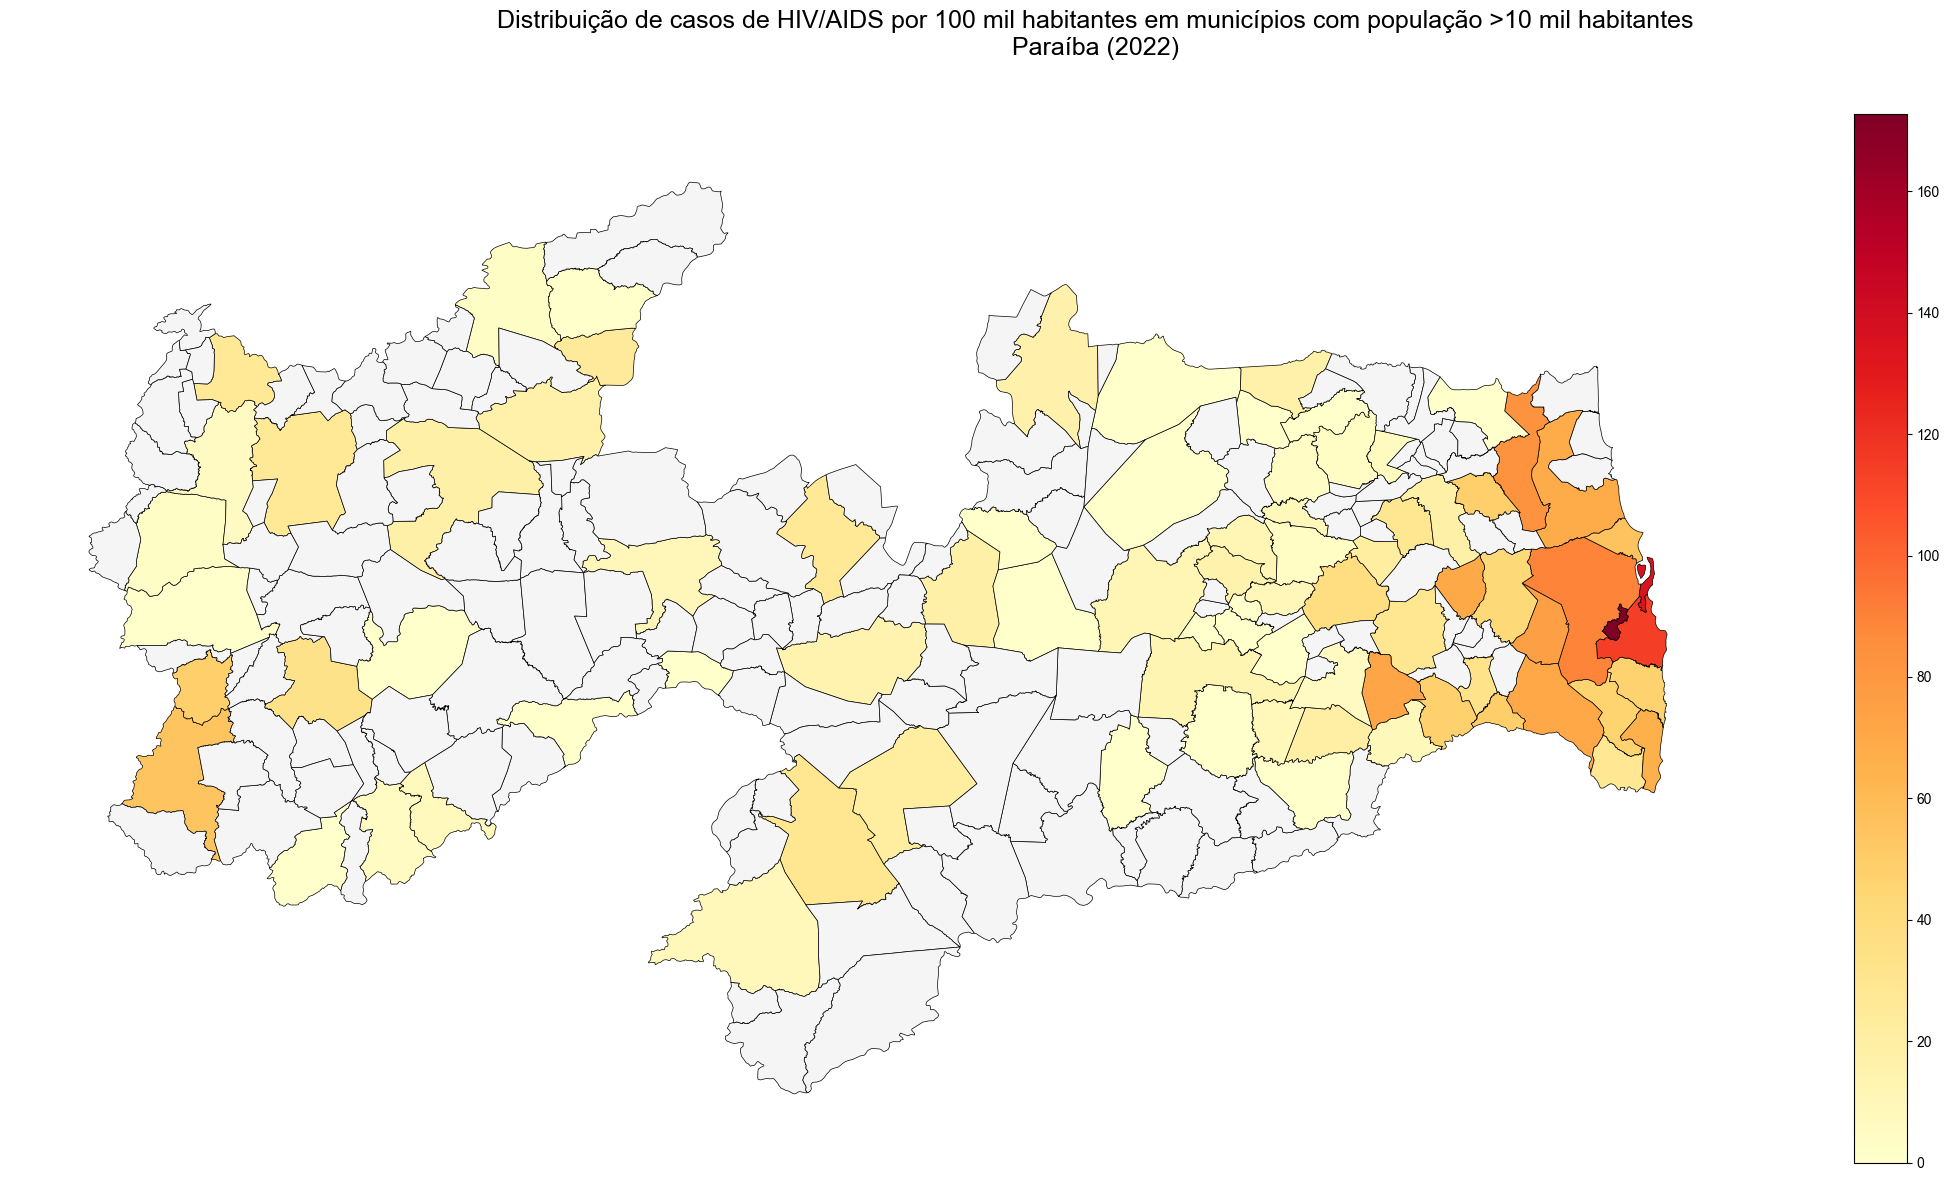

In [207]:
shapefile_path = "data/PB_Municipios_2024.shp"
gdf_pb = gpd.read_file(shapefile_path)

gdf_pb['NM_MUN'] = gdf_pb['NM_MUN'].apply(lambda x: remove_accents(str(x)).upper().strip())

gdf_map = gdf_pb.merge(
    df_mun_pop_2022[['Município', 'Casos por 100mil habitantes']],
    left_on='NM_MUN',
    right_on='Município',
    how='left'
)
plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(1, 1, figsize=(22, 12))

gdf_map.plot(
    column='Casos por 100mil habitantes',
    cmap='YlOrRd',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "whitesmoke",
        "edgecolor": "black",
        "label": "Sem dados"
    }
)

ax.axis('off')

fig.suptitle(
    'Distribuição de casos de HIV/AIDS por 100 mil habitantes em municípios com população >10 mil habitantes\nParaíba (2022)',
    fontsize=18,
    y=0.98,
    ha='center',
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [208]:
fig.savefig("figs/hiv_aids_pb_municipios_2022.pdf",
            format='pdf',       
            dpi=300,           
            bbox_inches='tight', 
            pad_inches=0.1,      
            facecolor='white',   
            transparent=True)

C:\Users\Paulo\AppData\Local\Temp\ipykernel_34148\1216306666.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10_mun['Município'], rotation=35, ha='right', fontsize=12)


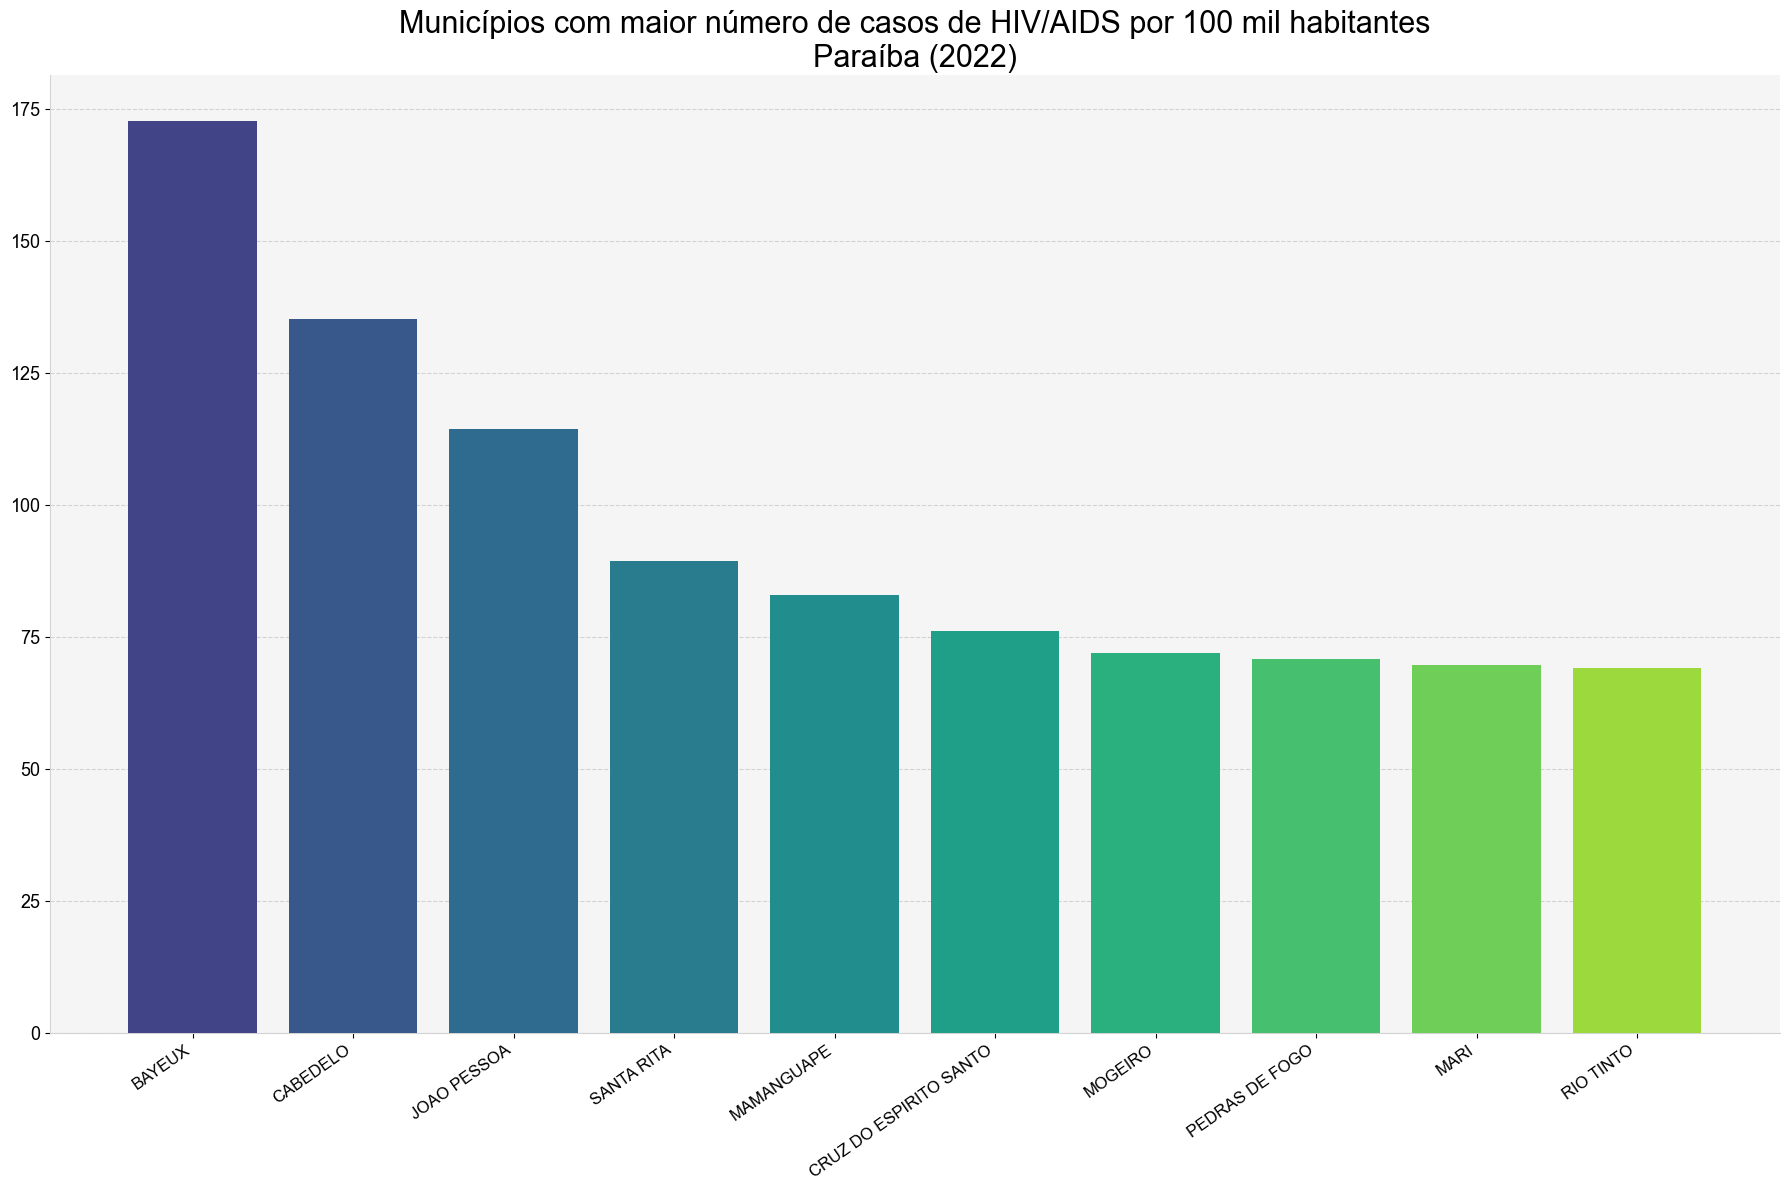

In [211]:
top10_mun = df_mun_pop_2022.sort_values(
    'Casos por 100mil habitantes', ascending=False
).head(10)

colors = plt.cm.viridis(np.linspace(0.2, 0.85, 10))

fig, ax1 = plt.subplots(figsize=(18, 12))

grey_bg = '#f5f5f5'
ax1.set_facecolor(grey_bg)

bars = ax1.bar(
    top10_mun['Município'],
    top10_mun['Casos por 100mil habitantes'],
    color=colors,
    edgecolor='gray',
    linewidth=0,
    zorder=3
)

ax1.set_xticklabels(top10_mun['Município'], rotation=35, ha='right', fontsize=12)

for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
for spine in ['bottom', 'left']:
    ax1.spines[spine].set_visible(True)
    ax1.spines[spine].set_color('lightgray')

ax1.set_title('Municípios com maior número de casos de HIV/AIDS por 100 mil habitantes\nParaíba (2022)', fontsize=22)
for label in ax1.get_yticklabels():
    label.set_fontfamily('Arial')
    label.set_fontsize(13)
ax1.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

plt.tight_layout()
plt.show()


In [213]:
fig.savefig("figs/hiv_aids_pb_top_mun_2022.pdf",
            format='pdf',       
            dpi=300,           
            bbox_inches='tight', 
            pad_inches=0.1,      
            facecolor='white',   
            transparent=False)

## 2. Análise da distribuição temporal

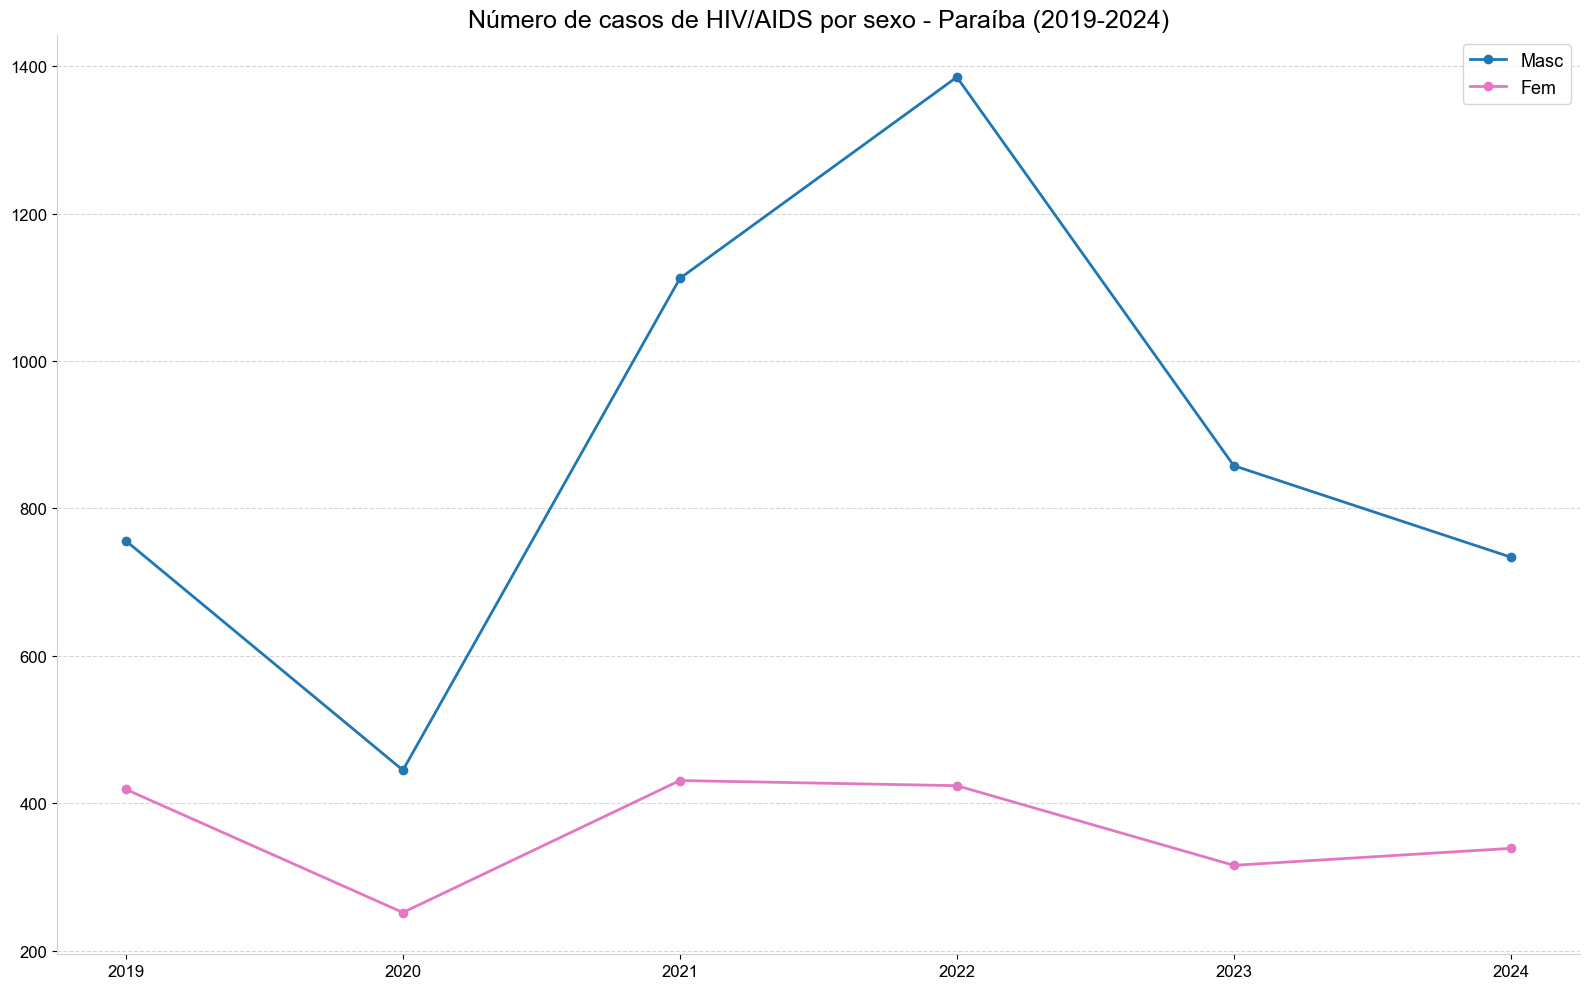

In [214]:

df_sex_plot = df_sex[df_sex['Sexo'].isin(['Masc', 'Fem'])].copy()

cols = [col for col in df_sex_plot.columns if col not in ['Sexo', 'Total']]

anos = [col.split('/')[0] for col in cols]

import numpy as np
sexos = ['Masc', 'Fem']
dados_ano = {sexo: {} for sexo in sexos}

for sexo in sexos:
    linha = df_sex_plot[df_sex_plot['Sexo'] == sexo]
    for col, ano in zip(cols, anos):
        valor = linha[col].values[0]
        try:
            v = float(valor)
        except:
            v = np.nan
        if ano not in dados_ano[sexo]:
            dados_ano[sexo][ano] = 0
        if not np.isnan(v):
            dados_ano[sexo][ano] += v

anos_unicos = sorted(set(anos))

valores_masc = [dados_ano['Masc'].get(ano, 0) for ano in anos_unicos]
valores_fem = [dados_ano['Fem'].get(ano, 0) for ano in anos_unicos]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(anos_unicos, valores_masc, marker='o', label='Masc', color='#1f77b4', linewidth=2)
ax.plot(anos_unicos, valores_fem, marker='o', label='Fem', color='#e377c2', linewidth=2)

ax.set_title('Número de casos de HIV/AIDS por sexo - Paraíba (2019-2024)', fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.legend(fontsize=13)
ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# Remover as bordas não essenciais e deixar as outras em tom cinza claro
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('lightgray')

plt.tight_layout()
plt.show()

In [215]:
fig.savefig("figs/hiv_aids_pb_sex_2019-2022.pdf",
            format='pdf',       
            dpi=300,           
            bbox_inches='tight', 
            pad_inches=0.1,      
            facecolor='white',   
            transparent=False)

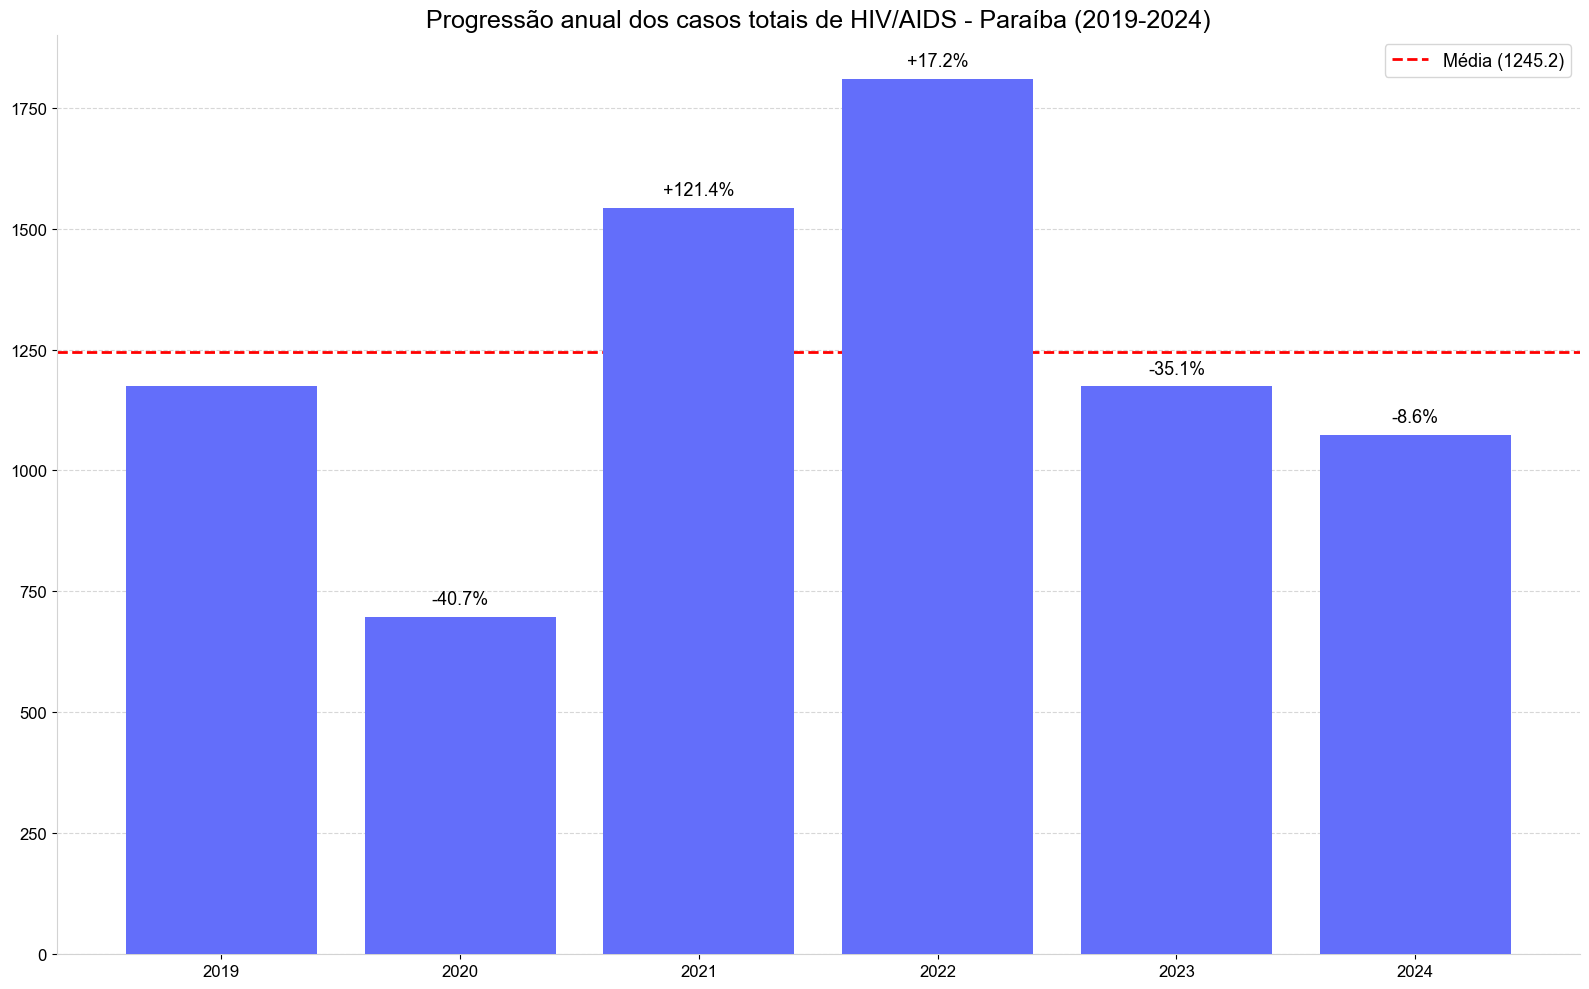

In [216]:
anos_bar = [str(ano) for ano in range(2019, 2025)]
linha_total = df_sex[df_sex['Sexo'] == 'Total']

valores_totais = []
for ano in anos_bar:
    if ano in linha_total.columns:
        valor = linha_total[ano].values[0]
    else:
        cols_ano = [col for col in linha_total.columns if col.startswith(f"{ano}/")]
        soma_ano = 0
        for col in cols_ano:
            try:
                v = float(linha_total[col].values[0])
            except:
                v = 0
            soma_ano += v
        valor = soma_ano
    try:
        v = float(valor)
    except:
        v = 0
    valores_totais.append(v)

percentuais = [None]
for i in range(1, len(valores_totais)):
    anterior = valores_totais[i-1]
    atual = valores_totais[i]
    if anterior == 0:
        pct = None
    else:
        pct = ((atual - anterior) / anterior) * 100
    percentuais.append(pct)

fig, ax = plt.subplots(figsize=(16, 10))
bars = ax.bar(anos_bar, valores_totais, color='#636efa', edgecolor='none', zorder=3)

for i, (bar, pct) in enumerate(zip(bars, percentuais)):
    height = bar.get_height()
    if pct is not None:
        if pct >= 0:
            txt = f"+{pct:.1f}%"
        else:
            txt = f"{pct:.1f}%"
        ax.text(bar.get_x() + bar.get_width()/2, height + max(valores_totais)*0.01, txt,
                ha='center', va='bottom', fontsize=13, color='black')
    else:
        ax.text(bar.get_x() + bar.get_width()/2, height + max(valores_totais)*0.01, "",
                ha='center', va='bottom', fontsize=13)

media = sum(valores_totais) / len(valores_totais)
media_label = f"Média ({media:.1f})"
ax.axhline(media, color='red', linestyle='--', linewidth=2, label=media_label)

ax.set_title('Progressão anual dos casos totais de HIV/AIDS - Paraíba (2019-2024)', fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
for label in ax.get_xticklabels():
    label.set_fontfamily('Arial')
for label in ax.get_yticklabels():
    label.set_fontfamily('Arial')
ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('lightgray')

ax.legend(fontsize=13)

plt.tight_layout()
plt.show()


In [217]:
fig.savefig("figs/hiv_aids_pb_2019-2022.pdf",
            format='pdf',       
            dpi=300,           
            bbox_inches='tight', 
            pad_inches=0.1,      
            facecolor='white',   
            transparent=False)

## 3. Faixas etárias mais efetadas

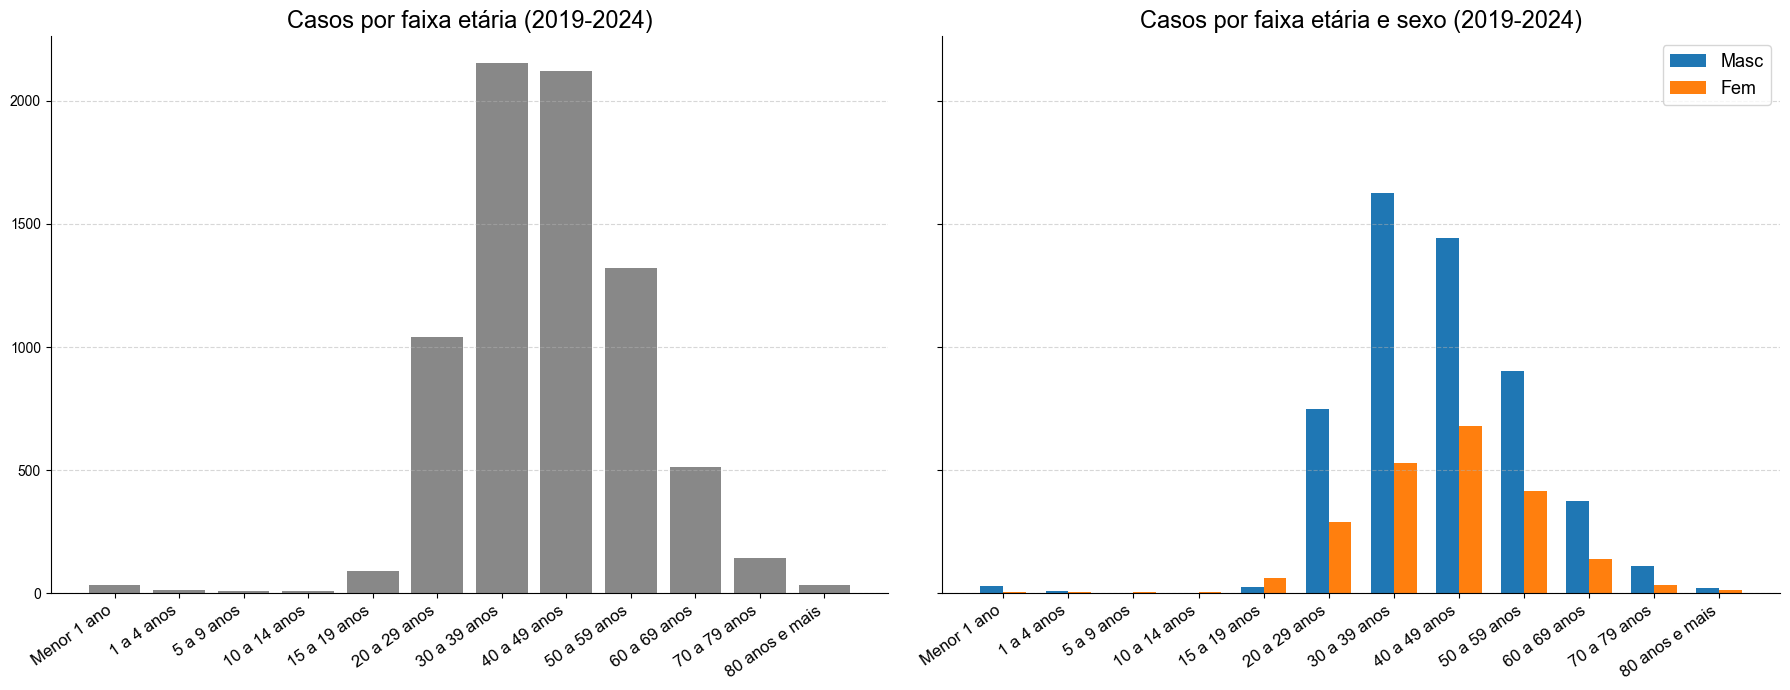

In [219]:
import matplotlib.pyplot as plt
import numpy as np

df_total = df_sex_age[df_sex_age['Sexo'] == 'Total'].copy()
df_plot = df_sex_age[df_sex_age['Sexo'] != 'Total'].copy()

faixas_etarias = [col for col in df_sex_age.columns if col not in ['Sexo', 'Total']]

x = np.arange(len(faixas_etarias))
width = 0.35

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

ax1.bar(x, df_total.iloc[0][faixas_etarias], color='#888888')
ax1.set_title('Casos por faixa etária (2019-2024)', fontsize=17)
ax1.set_xticks(x)
ax1.set_xticklabels(faixas_etarias, rotation=35, ha='right', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
for label in ax1.get_yticklabels():
    label.set_fontfamily('Arial')
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)

bars1 = ax2.bar(x - width/2, df_plot.iloc[0][faixas_etarias], width, label='Masc', color='#1f77b4')
bars2 = ax2.bar(x + width/2, df_plot.iloc[1][faixas_etarias], width, label='Fem', color='#ff7f0e')
ax2.set_title('Casos por faixa etária e sexo (2019-2024)', fontsize=17)
ax2.set_xticks(x)
ax2.set_xticklabels(faixas_etarias, rotation=35, ha='right', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
for label in ax2.get_yticklabels():
    label.set_fontfamily('Arial')
for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)
ax2.legend(fontsize=13)

plt.tight_layout()
plt.show()


In [224]:
# Calcula o percentual de homens entre 30 e 49 anos do total de casos (7471)
# Faixas etárias: '30 a 39 anos' e '40 a 49 anos' para sexo masculino
masc_30_39 = df_sex_age[(df_sex_age['Sexo'] == 'Masc')]['30 a 39 anos'].values[0]
masc_40_49 = df_sex_age[(df_sex_age['Sexo'] == 'Masc')]['40 a 49 anos'].values[0]
masc_30_49 = masc_30_39 + masc_40_49
percent_masc_30_49 = (masc_30_49 / 7471) * 100
print(f"Homens entre 30 e 49 anos: {masc_30_49} casos ({percent_masc_30_49:.1f}%) do total de 7471 casos.")

Homens entre 30 e 49 anos: 3065.0 casos (41.0%) do total de 7471 casos.


In [223]:
fig.savefig("figs/hiv_aids_pb_sex_age_2019-2022.pdf",
            format='pdf',       
            dpi=300,           
            bbox_inches='tight', 
            pad_inches=0.1,      
            facecolor='white',   
            transparent=False)